# Data Science Intership(Bharat Intern)

## Topic : Stock Price Prediction of TVS Motor Share

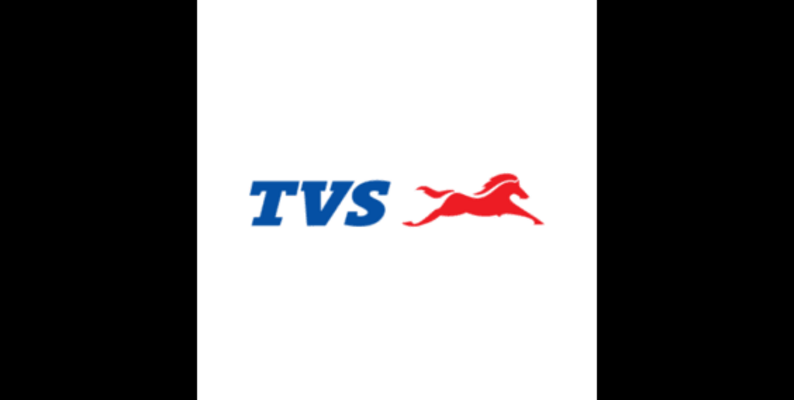

### Overview

The "TVS Motor Share Datasets" provide a comprehensive collection of historical stock market data for TVS Motor Company's shares. This dataset includes daily records of stock performance, spanning various financial attributes, and is suitable for in-depth analysis and prediction modeling. The dataset consists of essential financial indicators such as Open, High, Low, Close prices, Adj Close prices, and trading Volume. 

### Objective

 To examine patterns, trends, and potential relationships in TVS Motor's stock prices over time. It is  used for exploring market dynamics, developing predictive models, or conducting trend analysis, this dataset serves as a valuable resource for gaining insights into the historical behavior of TVS Motor Company's shares.

### Time Series - LSTM Model

we are familiar with statistical modelling on time series, but machine learning is all the rage right now, so it is essential to be familiar with some machine learning models as well. We shall start with the most popular model in time series domain − Long Short-term Memory model.

LSTM is a class of recurrent neural network. So before we can jump to LSTM, it is essential to understand neural networks and recurrent neural networks.

##### Neural Networks

An artificial neural network is a layered structure of connected neurons, inspired by biological neural networks. It is not one algorithm but combinations of various algorithms which allows us to do complex operations on data.

##### Recurrent Neural Networks

It is a class of neural networks tailored to deal with temporal data. The neurons of RNN have a cell state/memory, and input is processed according to this internal state, which is achieved with the help of loops with in the neural network. There are recurring module(s) of ‘tanh’ layers in RNNs that allow them to retain information. However, not for a long time, which is why we need LSTM models.

##### LSTM
Long short-term memory network is a recurrent neural network (RNN), aimed to deal with the vanishing gradient problem present in traditional RNNs. Its relative insensitivity to gap length is its advantage over other RNNs, hidden Markov models and other sequence learning methods. It aims to provide a short-term memory for RNN that can last thousands of timesteps, thus "long short-term memory". It is applicable to classification, processing and predicting data based on time series, such as in handwriting, speech recognition, machine translation,speech activity detection, robot control, video games, and healthcare.

A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell. Forget gates decide what information to discard from a previous state by assigning a previous state, compared to a current input, a value between 0 and 1. A (rounded) value of 1 means to keep the information, and a value of 0 means to discard it. Input gates decide which pieces of new information to store in the current state, using the same system as forget gates. Output gates control which pieces of information in the current state to output by assigning a value from 0 to 1 to the information, considering the previous and current states. Selectively outputting relevant information from the current state allows the LSTM network to maintain useful, long-term dependencies to make predictions, both in current and future time-steps.




In [2]:
import pandas as pd  #for data manipulation operations
import numpy as np   #for linear algebra

#Libraries for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle

In [3]:
#Loading the required data
df=pd.read_csv('C:/Users/Melbin Linson/Downloads/TVSMOTOR.csv')
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-10,959.950012,969.000000,950.099976,966.599976,961.854065,1247420
2022-08-11,971.000000,974.900024,955.099976,958.250000,953.545044,1035579
2022-08-12,960.000000,964.500000,950.950012,952.549988,947.873047,653263
2022-08-16,958.000000,981.700012,949.549988,979.099976,974.292664,965828
2022-08-17,981.000000,986.000000,968.250000,970.549988,965.784668,1182141


In [4]:
print('Number of days present in the dataset: ',df.shape[0])
print('Number of fields present in the dataset: ',df.shape[1])

Number of days present in the dataset:  247
Number of fields present in the dataset:  6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 2022-08-10 to 2023-08-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       247 non-null    float64
 1   High       247 non-null    float64
 2   Low        247 non-null    float64
 3   Close      247 non-null    float64
 4   Adj Close  247 non-null    float64
 5   Volume     247 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.5+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,1128.671255,1143.227326,1114.789681,1128.624493,1126.131237,1.477269e+06
std,123.590125,123.159394,122.657809,122.960784,124.623646,1.841963e+06
min,930.000000,959.200012,925.000000,936.950012,932.349670,0.000000e+00
25%,1039.875000,1053.700012,1026.724976,1038.375000,1033.973205,8.686805e+05
50%,1084.449951,1097.449951,1069.300049,1084.750000,1080.070801,1.159599e+06
75%,1233.000000,1245.099976,1223.275024,1238.324951,1238.324951,1.698861e+06
max,1393.000000,1400.900024,1365.400024,1384.000000,1384.000000,2.736398e+07


### Exploratory Data Analysis


In [7]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [8]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

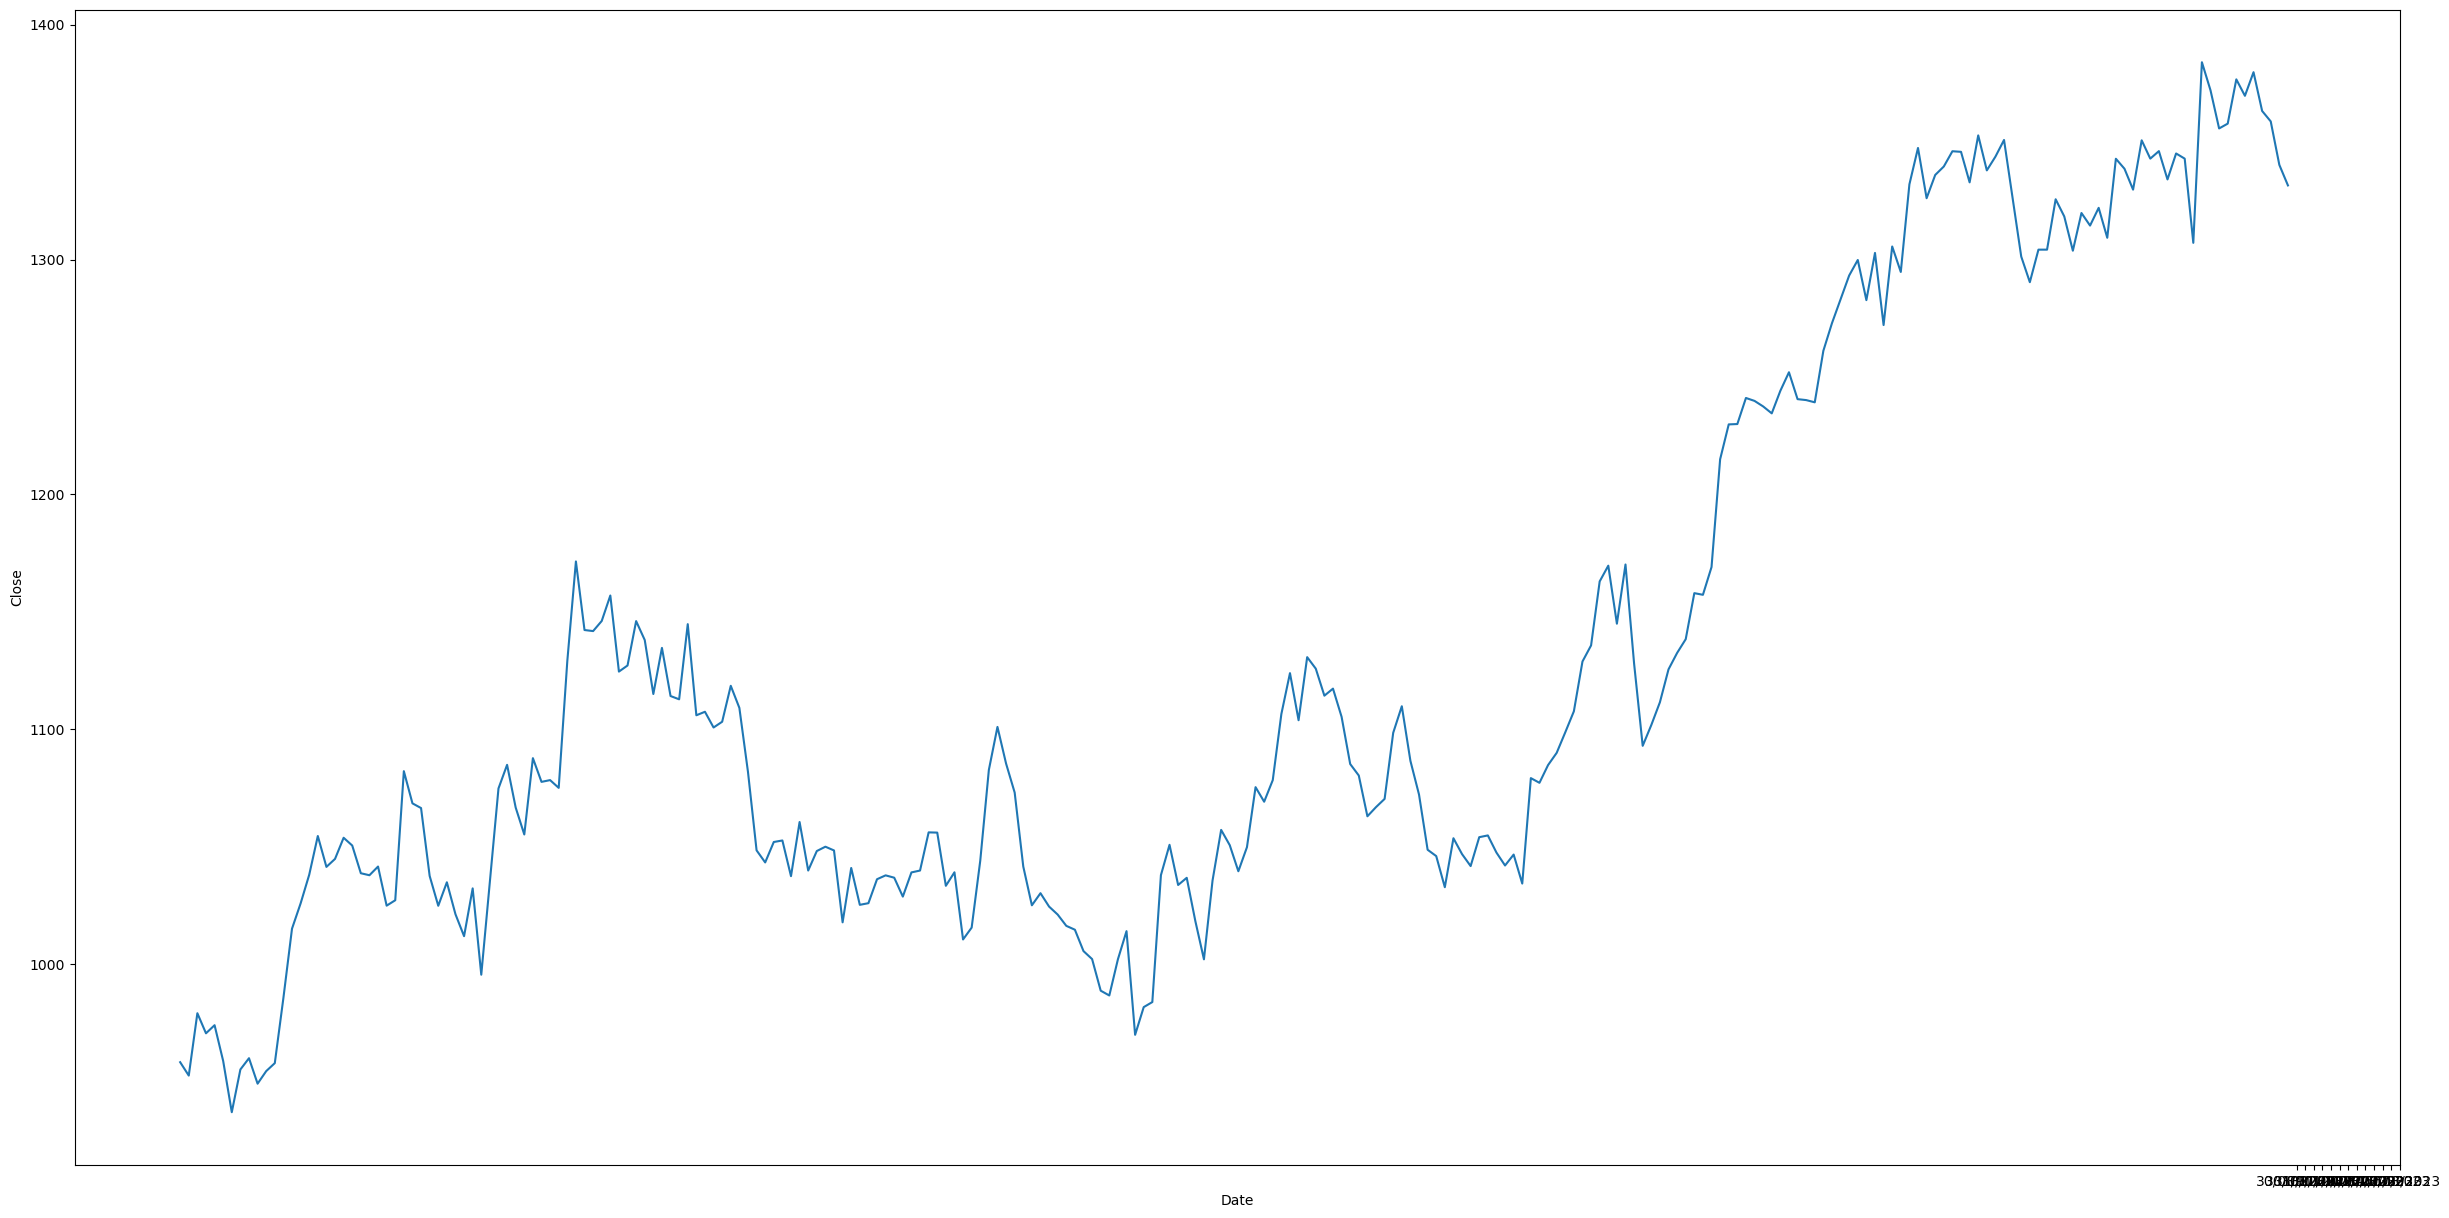

In [9]:
data=df.iloc[1:].copy()

plt.figure(figsize=(30,15))
ax=sns.lineplot(x=data.index,y=data['Close'])
plt.xticks(['30/08/2022','30/09/2022','31/10/2022','30/11/2022','31/12/2022','31/01/2023','28/02/2023','31/03/2023','30/04/2023','31/05/2023','30/06/2023','31/07/2023','08/08/2023'])
plt.show()

In [10]:
data=df.iloc[1:].copy()

names = cycle(['Stock Open Price','Stock High Price','Stock Low Price','Stock Close Price'])

fig = px.line(data, x=data.index, y=[data['Open'],data['High'], data['Low'],data['Close']],
             labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock Analysis', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.show()

## Moving Averages

Moving Averages (MA) are a type of time series analysis method used to smooth out fluctuations in data by calculating the average of a set of data over a certain period of time. This average is then shifted forward in time to provide a smoothed representation of the data that can help to identify underlying patterns or trends. There are two main types of moving averages: simple moving averages (SMA) and weighted moving averages (WMA). A simple moving average is calculated by taking the average of a set of data over a fixed period of time, while a weighted moving average gives more importance to the most recent data. Moving averages are widely used in finance, economics, and engineering to help forecast future trends and to identify buy/sell signals.

Here taking moving average for window sizes of 30,60,120 and 150 days

In [11]:
ma_day = [30, 60, 120,150]

for ma in ma_day:
        column_name = f"MA for {ma} days"
        data[column_name] = data['Close'].rolling(ma).mean()

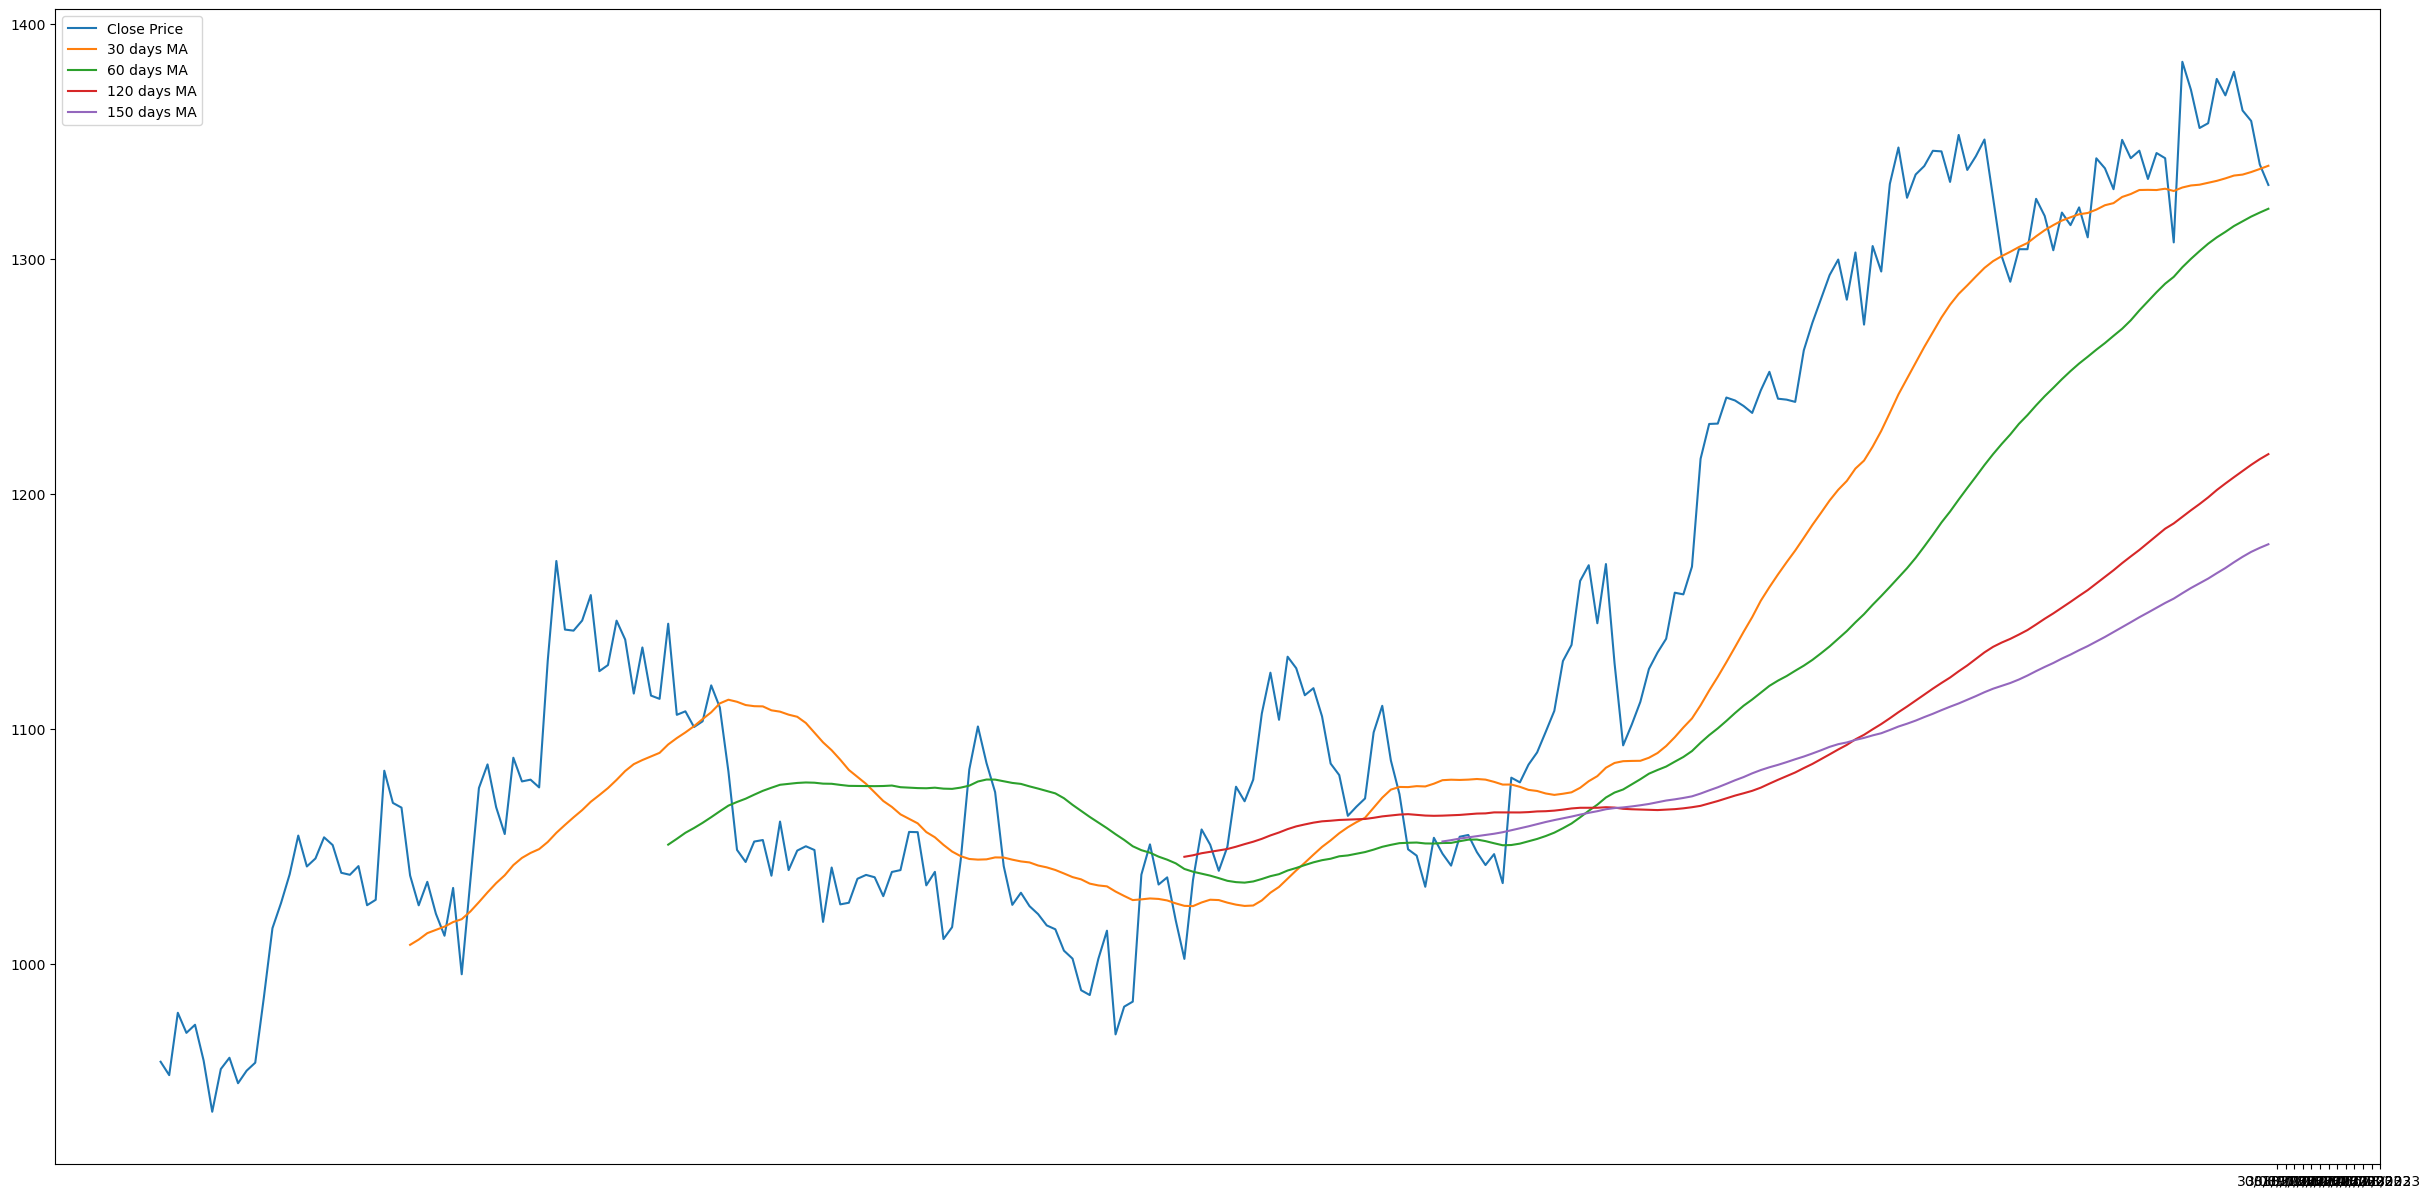

In [12]:
plt.figure(figsize=(30,15))
plt.plot(data['Close'],label='Close Price')
plt.plot(data['MA for 30 days'],label='30 days MA')
plt.plot(data['MA for 60 days'],label='60 days MA')
plt.plot(data['MA for 120 days'],label='120 days MA')
plt.plot(data['MA for 150 days'],label='150 days MA')
plt.xticks(['30/08/2022','30/09/2022','31/10/2022','30/11/2022','31/12/2022','31/01/2023','28/02/2023','31/03/2023','30/04/2023','31/05/2023','30/06/2023','31/07/2023','08/08/2023'])
plt.legend()
plt.show()

In [13]:
names = cycle(['Close Price','MA 30 days','MA 60 days','MA 120 days','MA 150 days'])

fig = px.line(data, x=data.index ,y=[data['Close'],data['MA for 30 days'],data['MA for 60 days'],data['MA for 120 days'], data['MA for 150 days']],labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Moving Average Analysis', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.show()

### Splitting the dataset into Training and Testing data

In [14]:
# Creating a new dataframe with only 'Close'
new_df = data['Close']
new_df.index = data.index

final_df=new_df.values

train_data=final_df[0:200,]
test_data=final_df[200:,]

train_df = pd.DataFrame()
test_df = pd.DataFrame()

train_df['Close'] = train_data
train_df.index = new_df[0:200].index
test_df['Close'] = test_data
test_df.index = new_df[200:].index

In [15]:
print("train_data: ", train_df.shape)
print("test_data: ", test_df.shape)

train_data:  (200, 1)
test_data:  (46, 1)


### Scaling data by using Min-max Scaler 

In [16]:
# Using Min-Max scaler to scale data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_df.reshape(-1,1))

X_train_data,y_train_data=[],[]

for i in range(60,len(train_df)):
    X_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
X_train_data,y_train_data=np.array(X_train_data),np.array(y_train_data)

X_train_data=np.reshape(X_train_data,(X_train_data.shape[0],X_train_data.shape[1],1))

### LSTM Model Building

In [17]:
# Initializing the LSTM model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_data.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train_data, y_train_data, epochs = 100, batch_size = 32);

Epoch 1/100
5/5 [==============================] - 20s 115ms/step - loss: 0.0984
Epoch 2/100
5/5 [==============================] - 1s 105ms/step - loss: 0.0413
Epoch 3/100
5/5 [==============================] - 1s 117ms/step - loss: 0.0360
Epoch 4/100
5/5 [==============================] - 1s 109ms/step - loss: 0.0330
Epoch 5/100
5/5 [==============================] - 1s 101ms/step - loss: 0.0207
Epoch 6/100
5/5 [==============================] - 1s 102ms/step - loss: 0.0204
Epoch 7/100
5/5 [==============================] - 1s 108ms/step - loss: 0.0210
Epoch 8/100
5/5 [==============================] - 1s 113ms/step - loss: 0.0180
Epoch 9/100
5/5 [==============================] - 0s 96ms/step - loss: 0.0182
Epoch 10/100
5/5 [==============================] - 1s 110ms/step - loss: 0.0159
Epoch 11/100
5/5 [==============================] - 0s 92ms/step - loss: 0.0150
Epoch 12/100
5/5 [==============================] - 0s 100ms/step - loss: 0.0146
Epoch 13/100
5/5 [====================

### Prediction

In [20]:
input_data=new_df[len(new_df)-len(test_df)-60:].values
input_data=input_data.reshape(-1,1)
input_data=scaler.transform(input_data)

In [21]:
X_test=[]
for i in range(60,input_data.shape[0]):
    X_test.append(input_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [22]:
predicted=model.predict(X_test)
predicted=scaler.inverse_transform(predicted)

2/2 [==============================] - 4s 64ms/step


In [23]:
test_df['Predictions']=predicted

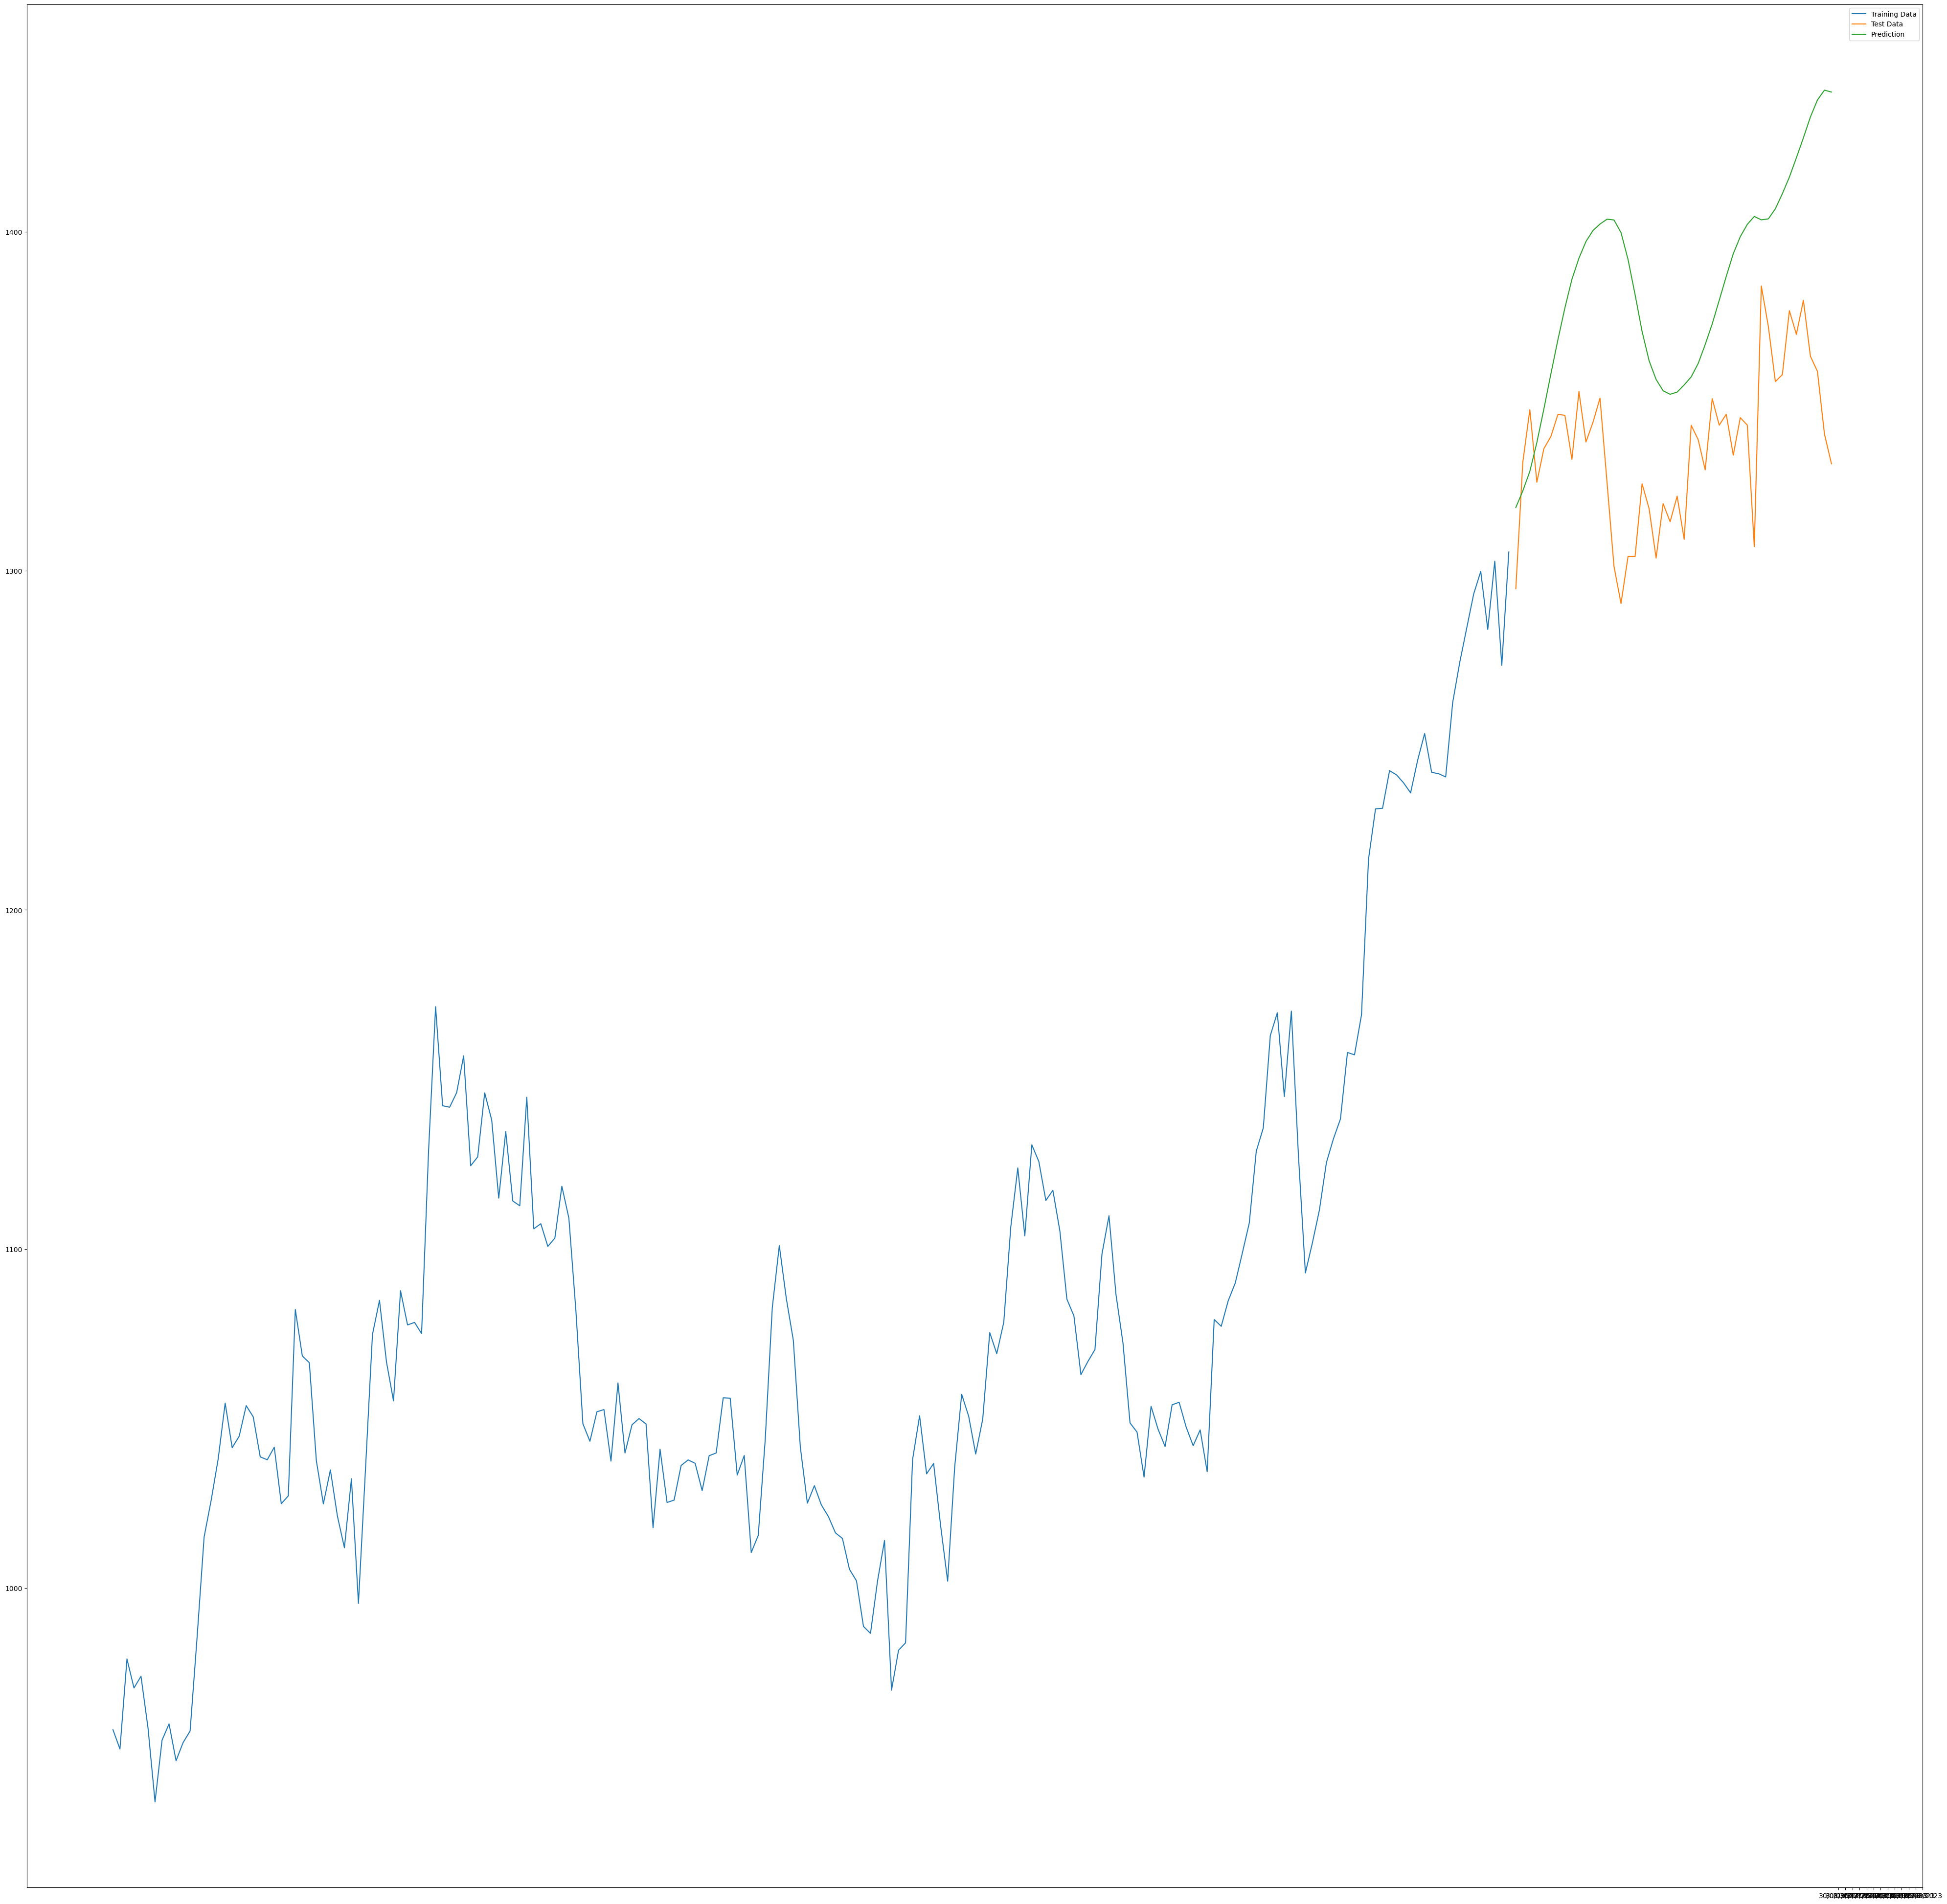

In [24]:
plt.figure(figsize=(50,50))
plt.plot(train_df['Close'],label='Training Data')
plt.plot(test_df['Close'],label='Test Data')
plt.plot(test_df['Predictions'],label='Prediction')
plt.xticks(['30/08/2022','30/09/2022','31/10/2022','30/11/2022','31/12/2022','31/01/2023','28/02/2023','31/03/2023','30/04/2023','31/05/2023','30/06/2023','31/07/2023','08/08/2023'])
plt.legend()
plt.show()

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index,y=train_df['Close'],
                    mode='lines',
                    name='Training Data'))
fig.add_trace(go.Scatter(x=test_df.index,y=test_df['Close'],
                    mode='lines',
                    name='Test Data'))
fig.add_trace(go.Scatter(x=test_df.index,y=test_df['Predictions'],
                    mode='lines',
                    name='Prediction'))

In [26]:
print('The Mean Squared Error is',mean_squared_error(test_df['Close'].values,test_df['Predictions'].values))
print('The Mean Absolute Error is',mean_absolute_error(test_df['Close'].values,test_df['Predictions'].values))
print('The Root Mean Squared Error is',np.sqrt(mean_squared_error(test_df['Close'].values,test_df['Predictions'].values))) 

The Mean Squared Error is 3109.6210914013413
The Mean Absolute Error is 48.84080701545516
The Root Mean Squared Error is 55.7639766462305
